In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
#create lookup table
def creat_lookup_table(img):
    table = np.zeros(256)

    #histogram
    for i in range(500):
        for j in range(500):
            table[img[i][j]] += 1
    #pdf
    for i in range(256):
        table[i] = table[i] / (500 * 500) * 255
    #cdf
    for i in range(1, 256):
        table[i] += table[i-1]
    #round
    for i in range(256):
        table[i] = round(table[i])

    return table

In [3]:
#equalization
def Equalization(img):
    table = creat_lookup_table(img)
    #將影像mapping
    for i in range(500):
        for j in range(500):
            img[i][j] = table[img[i][j]]
    return img

In [4]:
#generate histogram
def histogram(img):
    hist = np.zeros(256)   
    for i in range(500):
        for j in range(500):
            hist[img[i][j]] += 1
    plt.plot(hist)
    plt.show()

In [5]:
#顯示原始與直方圖
def show_result(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off') # 不顯示座標軸
    plt.show()
    histogram(img)

In [6]:
#影像處理
def adjust(img_name):
    #讀入影像
    img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)

    #顯示原始影像與直方圖
    show_result(img)
 
    #顯示修改後影像與直方圖    
    show_result(Equalization(img))

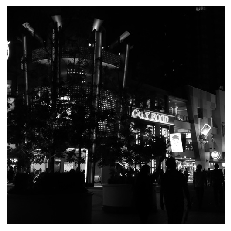

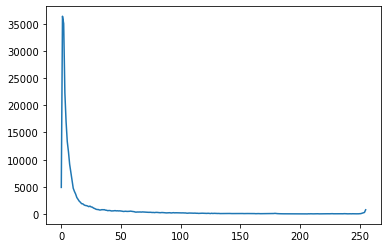

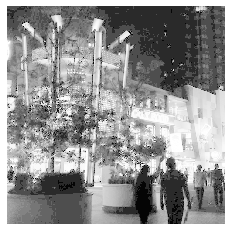

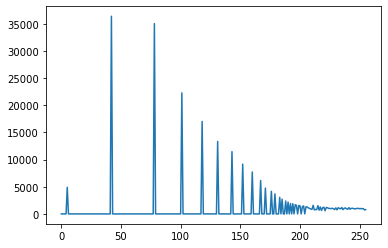

In [7]:
adjust("01.jpg")

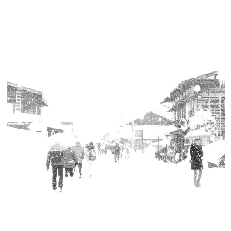

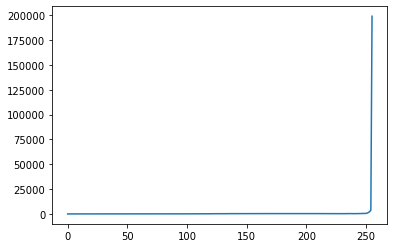

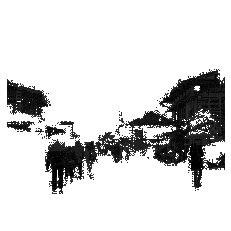

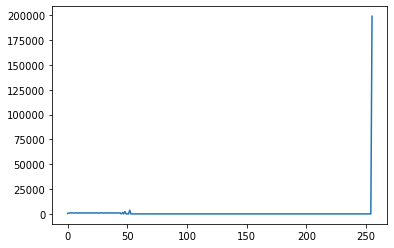

In [8]:
adjust("02.jpg")

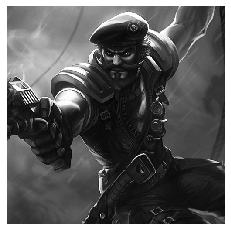

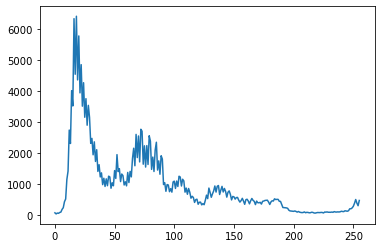

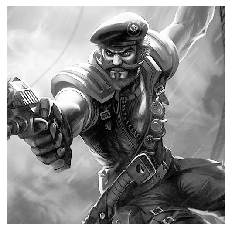

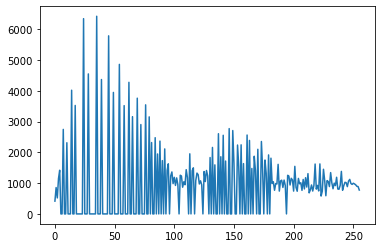

In [9]:
adjust("03.jpg")

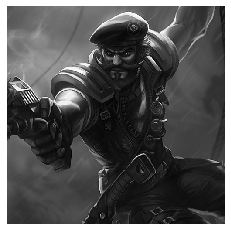

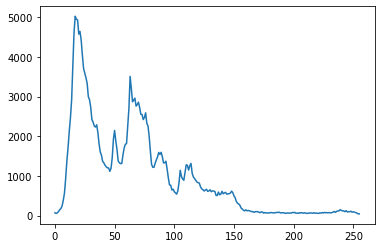

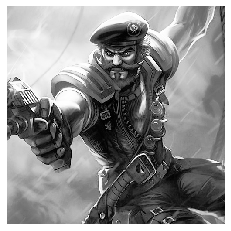

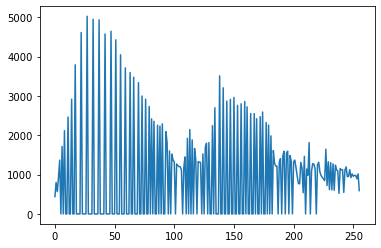

In [10]:
adjust("04.jpg")